In [1]:
import pandas as pnd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras

tf.config.set_visible_devices([], 'GPU')

#Définition de la longueur et de la largeur de l'image
LONGUEUR_IMAGE = 28
LARGEUR_IMAGE = 28

#Chargement des images
observations_entrainement = pnd.read_csv('datas/fashion-mnist_train.csv')

2025-11-17 03:44:50.370874: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-17 03:44:57.095792: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-17 03:45:03.662007: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-11-17 03:45:04.830630: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


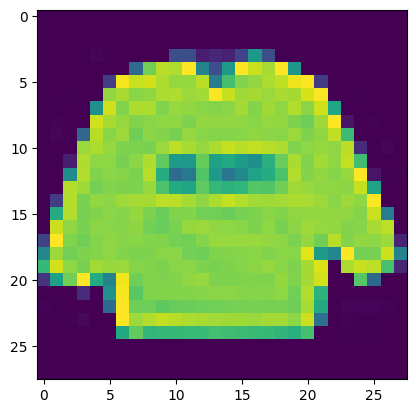

In [2]:
#On exclut la première colonne (les labels) pour constituer un tableau de pixels
X = np.array(observations_entrainement.iloc[:, 1:])

premiereImage = X[0]
premiereImage = premiereImage.reshape([LONGUEUR_IMAGE,LARGEUR_IMAGE])
plt.imshow(premiereImage)
plt.show()

In [3]:
#On crée des catégories à l'aide du module Keras
y = keras.utils.to_categorical(np.array(observations_entrainement.iloc[:,0]))
#Répartition des données d'entrainement en données d'apprentissage et données de validation
#80% de donnée d'apprentissage et 20% de donnée de validation
X_apprentissage, X_validation, y_apprentissage, y_validation = train_test_split(X, y, test_size=0.2, random_state=13)

In [4]:
# On redimensionne les images au format 28*28 et on réalise un scaling sur les données des pixels
X_apprentissage = X_apprentissage.reshape(X_apprentissage.shape[0], 
                                          LARGEUR_IMAGE, 
                                          LONGUEUR_IMAGE, 1)
X_apprentissage = X_apprentissage.astype('float32')
X_apprentissage /= 255

X_validation = X_validation.reshape(X_validation.shape[0], 
                                    LARGEUR_IMAGE, 
                                    LONGUEUR_IMAGE, 1)
X_validation = X_validation.astype('float32')
X_validation /= 255

In [5]:
#Preparation des données de tests
observations_test = pnd.read_csv('datas/fashion-mnist_test.csv')
X_test = np.array(observations_test.iloc[:, 1:])
y_test = tf.keras.utils.to_categorical(np.array(observations_test.iloc[:, 0]))
X_test = X_test.reshape(X_test.shape[0], 
                        LARGEUR_IMAGE, 
                        LONGUEUR_IMAGE, 1)
X_test = X_test.astype('float32')
X_test /= 255

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Input
from keras.layers import Conv2D, MaxPooling2D

# On spécifie les dimensions de l'image d'entrée
dimentionImage = (LARGEUR_IMAGE, LONGUEUR_IMAGE, 1)

# On crée le réseau de neurones couche par couche
reseauNeurone1Convolution = Sequential()

# Ajout de la couche d'entrée
reseauNeurone1Convolution.add(Input(shape=dimentionImage))

#1- Ajout de la couche de convolution comportant
# 32 filtres de de taille 3x3 (Kernel) parcourant l'image
# Une fonction d'activation de type ReLU (Rectified Linear Activation)
# Une image d'entrée de 28px * 28 px 
reseauNeurone1Convolution.add(Conv2D(32, 
                                     kernel_size=(3, 3), 
                                     activation='relu'))

#2- Définition de la fonction de pooling avec une fenêtre de 2px sur 2 px
reseauNeurone1Convolution.add(MaxPooling2D(pool_size=(2, 2)))

#3- Ajout d'une fonction d'ignorance
reseauNeurone1Convolution.add(Dropout(0.2))

#5 - On transforme en une seule ligne
reseauNeurone1Convolution.add(Flatten())

#6 - Ajout d'un réseau de neurones composé de 128 neurones avec 
# une fonction d'activation de type ReLU
reseauNeurone1Convolution.add(Dense(128, activation='relu'))

#7 - Ajout d'un réseau de neurones composé de 10 neurones avec une 
# fonction d'activation de type softmax
reseauNeurone1Convolution.add(Dense(10, activation='softmax'))

In [7]:
reseauNeurone1Convolution.compile(loss=keras.losses.categorical_crossentropy, 
                                  optimizer=tf.keras.optimizers.Adam(), 
                                  metrics=['accuracy'])

In [8]:
historique_apprentissage = reseauNeurone1Convolution.fit(
    X_apprentissage, 
    y_apprentissage,
    batch_size=256,
    epochs=10,
    verbose=1,
    validation_data=(X_validation, y_validation))

Epoch 1/10


2025-11-17 03:45:25.113962: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 150528000 exceeds 10% of free system memory.


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 291ms/step - accuracy: 0.7275 - loss: 0.7993

2025-11-17 03:46:22.511583: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 37632000 exceeds 10% of free system memory.


188/188 ━━━━━━━━━━━━━━━━━━━━ 60s 308ms/step - accuracy: 0.8079 - loss: 0.5493 - val_accuracy: 0.8674 - val_loss: 0.3796
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 60s 189ms/step - accuracy: 0.8750 - loss: 0.3527 - val_accuracy: 0.8825 - val_loss: 0.3314
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 39s 180ms/step - accuracy: 0.8909 - loss: 0.3091 - val_accuracy: 0.8910 - val_loss: 0.3086
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 181ms/step - accuracy: 0.9006 - loss: 0.2817 - val_accuracy: 0.8996 - val_loss: 0.2813
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 40s 176ms/step - accuracy: 0.9052 - loss: 0.2647 - val_accuracy: 0.8988 - val_loss: 0.2784
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 42s 181ms/step - accuracy: 0.9107 - loss: 0.2483 - val_accuracy: 0.9052 - val_loss: 0.2628
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 182ms/step - accuracy: 0.9158 - loss: 0.2347 - val_accuracy: 0.9089 - val_loss: 0.2544
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 41s 180ms/step - accuracy: 0.9205 - loss: 0.2212 - val

In [9]:
evaluation = reseauNeurone1Convolution.evaluate(X_test, y_test, verbose=0)
print('Erreur:', evaluation[0])
print('Précision:', evaluation[1])

Erreur: 0.2354830801486969
Précision: 0.9165999889373779


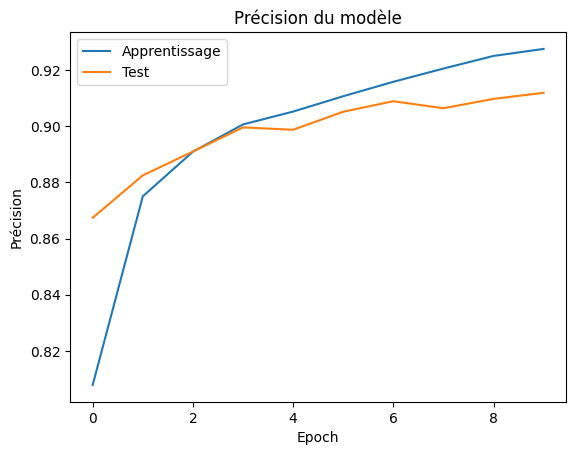

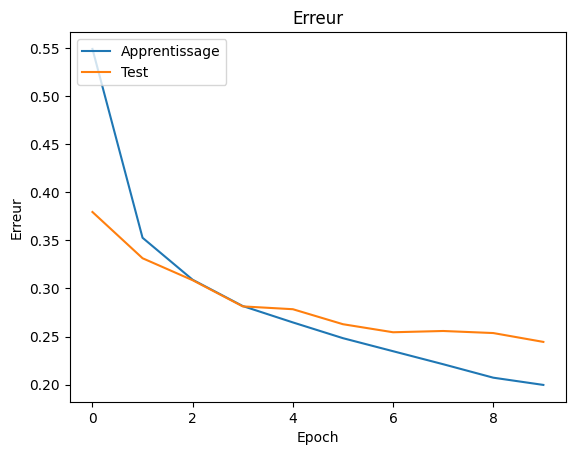

In [10]:
plt.plot(historique_apprentissage.history['accuracy'])
plt.plot(historique_apprentissage.history['val_accuracy'])
plt.title('Précision du modèle')
plt.ylabel('Précision')
plt.xlabel('Epoch')
plt.legend(['Apprentissage', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(historique_apprentissage.history['loss'])
plt.plot(historique_apprentissage.history['val_loss'])
plt.title('Erreur')
plt.ylabel('Erreur')
plt.xlabel('Epoch')
plt.legend(['Apprentissage', 'Test'], loc='upper left')
plt.show()

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

generateur_images = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=8,
    width_shift_range=0.08,
    shear_range=0.3,
    height_shift_range=0.08,
    zoom_range=0.08)

In [12]:
nouvelles_images_apprentissage = generateur_images.flow(
    X_apprentissage, 
    y_apprentissage,
    batch_size=256)

nouvelles_images_validation = generateur_images.flow(
    X_validation, 
    y_validation,
    batch_size=256)

historique_apprentissage = reseauNeurone1Convolution.fit(
    nouvelles_images_apprentissage,
    steps_per_epoch=48000//256,
    epochs=50,
    validation_data=nouvelles_images_validation,
    validation_steps=12000//256,
    verbose=1 )

evaluation = reseauNeurone1Convolution.evaluate(X_test, y_test, verbose=0)

print('Erreur :', evaluation[0])
print('Précision:', evaluation[1])

/home/vscode/.local/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 53s 279ms/step - accuracy: 0.8283 - loss: 0.4609 - val_accuracy: 0.8412 - val_loss: 0.4278
Epoch 2/50
  1/187 ━━━━━━━━━━━━━━━━━━━━ 24s 132ms/step - accuracy: 0.8750 - loss: 0.3784

/home/vscode/.local/lib/python3.12/site-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


187/187 ━━━━━━━━━━━━━━━━━━━━ 5s 27ms/step - accuracy: 0.8750 - loss: 0.3784 - val_accuracy: 0.8438 - val_loss: 0.4158
Epoch 3/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 83s 444ms/step - accuracy: 0.8480 - loss: 0.4074 - val_accuracy: 0.8578 - val_loss: 0.3857
Epoch 4/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.8242 - loss: 0.4346 - val_accuracy: 0.8524 - val_loss: 0.3896
Epoch 5/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 82s 437ms/step - accuracy: 0.8561 - loss: 0.3839 - val_accuracy: 0.8626 - val_loss: 0.3696
Epoch 6/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 10s 53ms/step - accuracy: 0.8750 - loss: 0.3414 - val_accuracy: 0.8646 - val_loss: 0.3755
Epoch 7/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 82s 440ms/step - accuracy: 0.8606 - loss: 0.3715 - val_accuracy: 0.8682 - val_loss: 0.3529
Epoch 8/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 10s 54ms/step - accuracy: 0.8984 - loss: 0.2656 - val_accuracy: 0.8693 - val_loss: 0.3603
Epoch 9/50
187/187 ━━━━━━━━━━━━━━━━━━━━ 82s 438ms/step - accuracy: 0.8651 - loss: 0.3621 - val_accu

In [13]:
#Sauvegarde du modèle
# Serialisation du modèle 
model_json = reseauNeurone1Convolution.to_json() 
with open("modele/modele.json", "w") as json_file:
    json_file.write(model_json)
    
# Serialisation des poids
reseauNeurone1Convolution.save_weights("modele/modele.weights.h5")
print("Modèle sauvegardé !")

Modèle sauvegardé !


In [14]:
from keras.layers import BatchNormalization

reseauNeurones4Convolution = Sequential()

reseauNeurones4Convolution.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=dimentionImage))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(MaxPooling2D(pool_size=(2, 2)))
reseauNeurones4Convolution.add(Dropout(0.25))

reseauNeurones4Convolution.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(Dropout(0.25))

reseauNeurones4Convolution.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(MaxPooling2D(pool_size=(2, 2)))
reseauNeurones4Convolution.add(Dropout(0.25))

reseauNeurones4Convolution.add(Flatten())
reseauNeurones4Convolution.add(Dense(512, activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(Dropout(0.5))

reseauNeurones4Convolution.add(Dense(128, activation='relu'))
reseauNeurones4Convolution.add(BatchNormalization())
reseauNeurones4Convolution.add(Dropout(0.5))

reseauNeurones4Convolution.add(Dense(10, activation='softmax'))

/home/vscode/.local/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
reseauNeurones4Convolution.compile(loss=keras.losses.categorical_crossentropy, 
                                  optimizer=tf.keras.optimizers.Adam(), 
                                  metrics=['accuracy'])

historique_apprentissage = reseauNeurones4Convolution.fit(
    X_apprentissage, 
    y_apprentissage,
    batch_size=256,
    epochs=10,
    verbose=1,
    validation_data=(X_validation, y_validation))

Epoch 1/10


2025-11-17 04:37:25.841901: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 150528000 exceeds 10% of free system memory.


188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 896ms/step - accuracy: 0.6445 - loss: 1.1219

2025-11-17 04:40:22.372709: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 37632000 exceeds 10% of free system memory.


188/188 ━━━━━━━━━━━━━━━━━━━━ 187s 954ms/step - accuracy: 0.7388 - loss: 0.7606 - val_accuracy: 0.1573 - val_loss: 3.4940
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 231s 1s/step - accuracy: 0.8442 - loss: 0.4414 - val_accuracy: 0.4688 - val_loss: 2.1553
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 247s 1s/step - accuracy: 0.8673 - loss: 0.3717 - val_accuracy: 0.8110 - val_loss: 0.5172
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 224s 1s/step - accuracy: 0.8823 - loss: 0.3317 - val_accuracy: 0.8973 - val_loss: 0.2802
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 245s 1s/step - accuracy: 0.8906 - loss: 0.3062 - val_accuracy: 0.9006 - val_loss: 0.2766
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 207s 1s/step - accuracy: 0.8990 - loss: 0.2840 - val_accuracy: 0.9119 - val_loss: 0.2470
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 272s 1s/step - accuracy: 0.9043 - loss: 0.2699 - val_accuracy: 0.9061 - val_loss: 0.2567
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 256s 1s/step - accuracy: 0.9084 - loss: 0.2578 - val_accuracy: 0.

In [16]:
evaluation = reseauNeurones4Convolution.evaluate(X_test, y_test, verbose=0)
print('Erreur:', evaluation[0])
print('Précision:', evaluation[1])

Erreur: 0.22053217887878418
Précision: 0.9204999804496765
